In [72]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from matplotlib import pyplot as plt

In [2]:
from hhm import *

In [5]:
def V(t):
    return -10 if 2 < t < 22 else -100

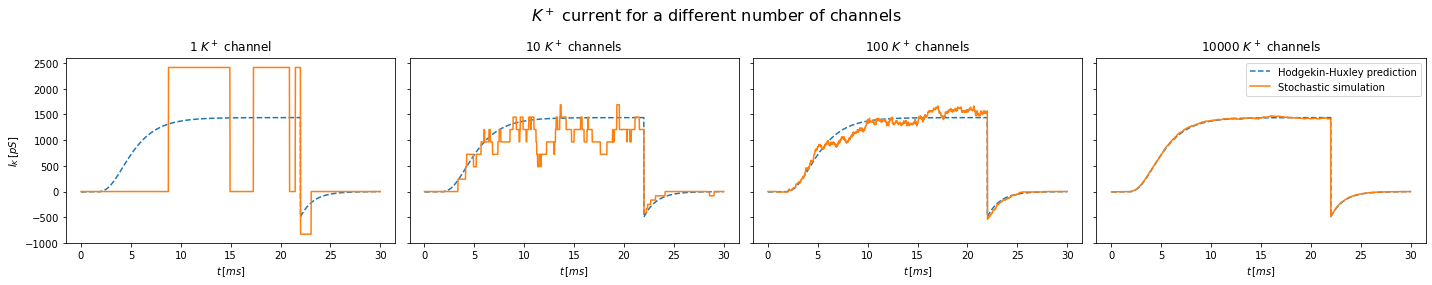

In [47]:
t_max = 30
num_channels = [1, 10, 100, 10000]

fig, axes = plt.subplots(ncols=len(num_channels), figsize=(5*len(num_channels), 4))

for ax, num in zip(axes, num_channels):
    ts, current_hh_K = vc_current_K(V, t_max=t_max)
    ts, current_stochastic_K = stochastic_vc_current(
        KChannels(num), V=V, E=E_K, g=g_K, t_max=t_max
    )

    ax.plot(ts, current_hh_K, label="Hodgekin-Huxley prediction", linestyle="--")
    ax.plot(ts, current_stochastic_K, label="Stochastic simulation")
    ax.set_xlabel(r"$t\, [ms]$")
    ax.set_title(f"{num} $K^+$ channel{'s' if num > 1 else ''}")
    ax.set_ylim((-1000, 2600))

axes[0].set_ylabel(r"$I_{K}\, [pS]$")
for ax in axes[1:]:
    ax.set_yticklabels([])
axes[-1].legend()

plt.subplots_adjust(top=0.95)
plt.suptitle("$K^+$ current for a different number of channels", fontsize=16)
plt.tight_layout()

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

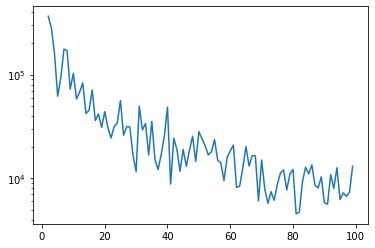

In [73]:
K_currents = []
nums = np.round(np.linspace(1+1, 100-1, 97)).astype(int)

for num in nums:
    print(num, end=" ")
    _, current_K = stochastic_vc_current(KChannels(num), V=V, E=E_K, g=g_K, t_max=t_max)
    K_currents.append(np.mean((current_K - current_hh_K) ** 2))

plt.plot(nums, K_currents)
plt.yscale("log")

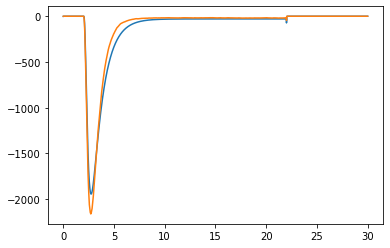

In [6]:
t_max = 30

ts, current_hh_Na = vc_current_Na(lambda t: -10 if 2 < t < 22 else -100, t_max=t_max)
ts, current_stochastic_Na = stochastic_vc_current(NaChannels(), V=V, E=E_Na, g=g_Na, t_max=t_max)

plt.plot(ts, current_hh_Na)
plt.plot(ts, current_stochastic_Na)

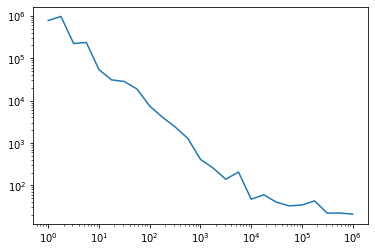

In [7]:
currents = []
num_channels = 10 ** np.arange(0, 6+0.25, 0.25)

for num in num_channels:
    _, K_current = stochastic_vc_current(
        KChannels(int(num)),
        V=lambda t: -10 if 2 < t < 22 else -100,
        E=E_K,
        g=g_K,
        t_max=30,
    )
    currents.append(np.mean((K_current - current_hh_K) ** 2))

plt.plot(num_channels, currents)
plt.xscale("log")
plt.yscale("log")

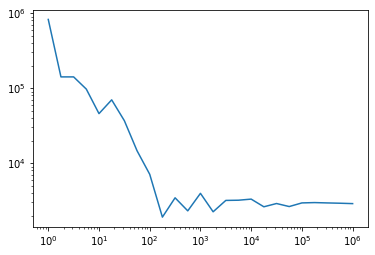

In [17]:
currents = []
num_channels = 10 ** np.arange(0, 6+0.25, 0.25)

for num in num_channels:
    _, Na_current = stochastic_vc_current(
        NaChannels(int(num)),
        V=lambda t: -10 if 2 < t < 22 else -100,
        E=E_Na,
        g=g_Na,
        t_max=t_max,
    )
    currents.append(np.mean((Na_current - current_hh_Na) ** 2))


plt.plot(num_channels, currents)
plt.xscale("log")
plt.yscale("log")

<AxesSubplot:xlabel='t'>

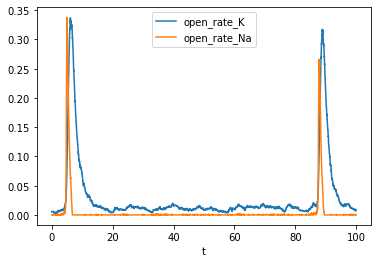

In [10]:
stochastic_hhm(t_max=100).plot(x="t", y=["open_rate_K", "open_rate_Na"])

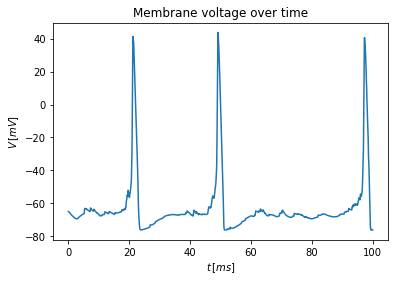

In [32]:
ax = stochastic_hhm(t_max=100, I_e=lambda t: -1).plot(x="t", y="V", legend=False)
ax.ticklabel_format(useOffset=False)
plt.xlabel(r"$t\, [ms]$")
plt.ylabel(r"$V\, [mV]$")
plt.title("Membrane voltage over time")
plt.show()

0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 

<ErrorbarContainer object of 3 artists>

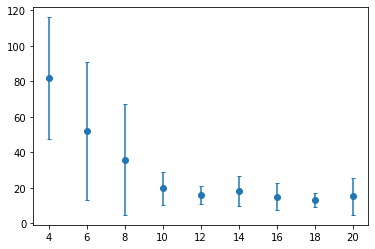

In [71]:
# saturates at 20
I_es = np.linspace(0, 20, 11)
isis, stds = [], []

for I_e in I_es:
    # good values: t_max=500, num=10000
    data = stochastic_hhm(t_max=300, I_e=lambda t: I_e, num_K=10000, num_Na=10000)
    peaks = find_peaks(data["V"], height=20)[0]
    t_peaks = data["t"].loc[peaks].to_numpy()
    if peaks.size >= 2:
        isi = t_peaks[1:] - t_peaks[:-1]
        isis.append(np.mean(isi))
        stds.append(np.std(isi))
    else:
        isis.append(np.inf)
        stds.append(np.inf)
    print(I_e, end=" ")

plt.errorbar(I_es, isis, stds, fmt="o", capsize=20)